<a href="https://colab.research.google.com/github/everestso/Fall24Spring25/blob/main/c164InClass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://drive.google.com/file/d/17l_o8xzlbVw0c7rXvgYIVf8mL5oWhYb7/view?usp=sharing
!gdown 17l_o8xzlbVw0c7rXvgYIVf8mL5oWhYb7

Downloading...
From: https://drive.google.com/uc?id=17l_o8xzlbVw0c7rXvgYIVf8mL5oWhYb7
To: /content/iris_data.csv
100% 4.61k/4.61k [00:00<00:00, 4.14MB/s]


In [2]:
# Import the necessary modules
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Import packages for evaluation
# Your code here

# Read in the file fg_attempt.csv
iris_dataset = pd.read_csv('iris_data.csv')

print (f"{iris_dataset.shape}")
x1Name = 'petal_length'
x2Name = 'petal_width'
x3Name = 'sepal_length'
x4Name = 'sepal_width'

# Create a dataframe X containing 2 features
X = iris_dataset[[x1Name, x2Name]]
# Create a dataframe y containing 'class'
y = iris_dataset['class']

y = np.ravel(y)

# Initialize model with k=3
KNN_Model = KNeighborsClassifier(n_neighbors=3)

# Fit the model
KNN_Model.fit(X, y)

# Input feature values for a sample instance

x1 = float(input())
x2 = float(input())

# Create a new dataframe with 'petal_length', 'petal_width'
XNew = pd.DataFrame([[x1, x2]], columns=[x1Name, x2Name])

# Predict the outcome from the new data
pred = KNN_Model.predict(XNew)
print(pred)

# Determine the accuracy of the model logisticModel
score = 0.0
print(f"{score:.2f}")



(150, 5)
1
2
['Iris-setosa']
0.00


In [ ]:
# prompt: Could you score this model for me.

from sklearn.metrics import accuracy_score

# Determine the accuracy of the model
y_pred = KNN_Model.predict(X) # Predict on the test set
score = accuracy_score(y, y_pred) # Calculate accuracy using test set
print(f"{score:.2f}")

# Determine the accuracy of the model
score = KNN_Model.score(X, y) # Predict on the test set
print(f"{score:.2f}")


0.98
0.98


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


TypeError: Image data of dtype object cannot be converted to float

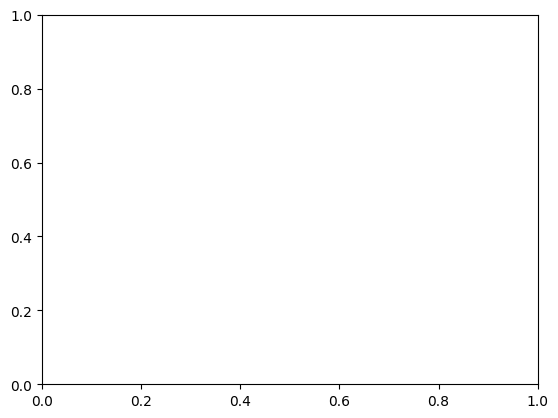

In [ ]:
# prompt: NOw generate the decision boundary plot for this model.

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = KNN_Model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (3))
plt.show()


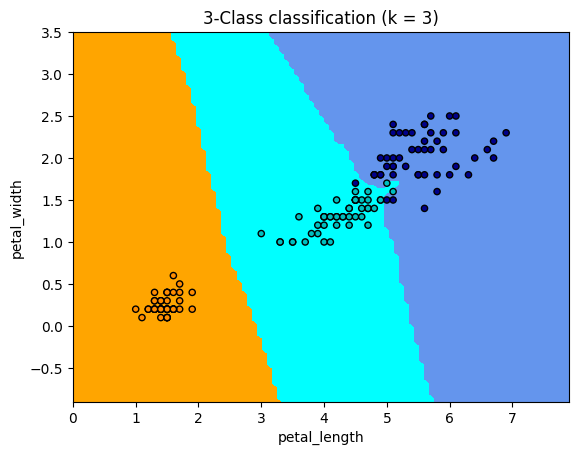

In [9]:
# prompt: Redo this decision boundary plot using sklearn.inspection import DecisionBoundaryDisplay.
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap # Import ListedColormap

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue']) # Define cmap_light
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Initialize model with k=3
KNN_Model = KNeighborsClassifier(n_neighbors=3)

# Fit the model
KNN_Model.fit(X, y)

# ... (rest of your existing code)

# Use DecisionBoundaryDisplay
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    KNN_Model, X, cmap=cmap_light, ax=ax, response_method="predict"
)

# Plot also the training points
# Convert string labels to numerical values for color mapping
y_numeric = pd.factorize(y)[0]  # Convert class labels to numerical values

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_numeric, cmap=cmap_bold, # Use y_numeric for color
            edgecolor='k', s=20)

plt.title("3-Class classification (k = %i)" % (3))
plt.show()


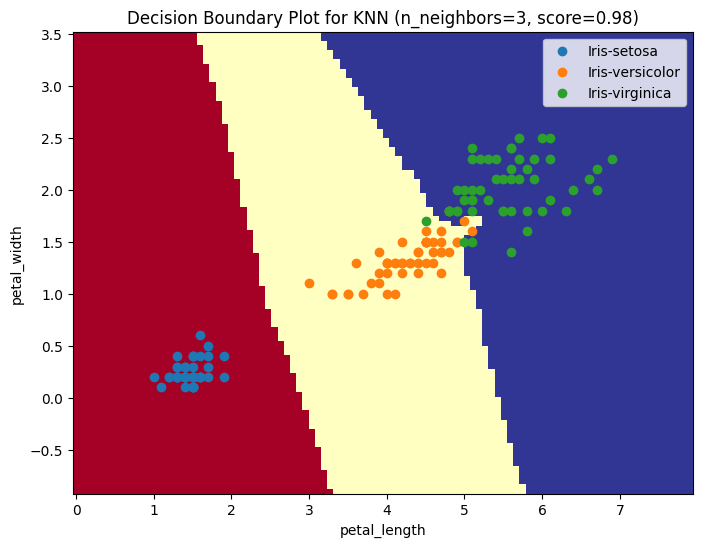

In [5]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Use a variable for n_neighbors
k = 3  # You can adjust the number of neighbors

# Initialize a KNeighborsClassifier model
knnModel = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knnModel.fit(X, y)

# Determine the accuracy of the model
score = knnModel.score(X, y)

# Create the decision boundary plot
_, ax = plt.subplots(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(
    knnModel,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    plot_method="pcolormesh",
    ax=ax,
)

# Plot the data points
for species in iris_dataset['class'].unique():
    subset = iris_dataset[iris_dataset['class'] == species]
    ax.scatter(subset[x1Name], subset[x2Name], label=species)

ax.set_xlabel(x1Name)
ax.set_ylabel(x2Name)
ax.set_title(f'Decision Boundary Plot for KNN (n_neighbors={k}, score={score:.2f})')  # Include k in the title
ax.legend()
plt.show()